In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
#--- Web scriping ---
import requests
from bs4 import BeautifulSoup
#--- ------------ ---
from datetime import datetime, date, timedelta
#from googletrans import Translator 

import sqlite3

# <font style="font-size: 80px"><font color="yellow">C</font><font style="color: whitesmoke">onsume </font><font color="yellow">P</font><font style="color: whitesmoke">roduct </font><font color="yellow">I</font><font style="color: whitesmoke">ndex </font>(<font color="yellow">CPI</font>)</font>

### Getting data

In [205]:
url = 'https://thedocs.worldbank.org/en/doc/1ad246272dbbc437c74323719506aa0c-0350012021/original/Inflation-data.xlsx'
local_path = '../../CSV crudo/InflationWorldData.xlsx'

response = requests.get(url)

if(response.status_code == 200):
    with open(local_path, 'wb') as file:
        file.write(response.content)
    print(f'Download success, status code {response.status_code}')
else:
    print(f'Download Error, status code {response.status_code}')

Download success, status code 200


In [206]:
#Inflation = pd.read_excel("../..//CSV crudo/InflationWorld.xlsx")
excel = "../../CSV crudo/InflationWorldData.xlsx"
sheets = openpyxl.load_workbook(excel) #https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG

In [207]:
print(sheets.sheetnames)

['Intro', 'top', 'hcpi_m', 'hcpi_q', 'hcpi_a', 'ecpi_m', 'ecpi_q', 'ecpi_a', 'fcpi_m', 'fcpi_q', 'fcpi_a', 'ccpi_m', 'ccpi_q', 'ccpi_a', 'ppi_m', 'ppi_q', 'ppi_a', 'def_q', 'def_a', 'Aggregate']


In [208]:
CPIa = pd.read_excel(excel, sheet_name="hcpi_a")

---

### <font style="color: yellow">Columns</font>

In [209]:
CPIa.drop(columns=["Note", "IMF Country Code", "Indicator Type", "Series Name"], inplace=True)
CPIa.rename(columns={"Country Code":"Code"}, inplace=True)
CPIa[["Code", "Country"]] = CPIa[["Country", "Code"]]
CPIa.rename(columns={"Code":"Country", "Country":"Code"}, inplace=True) #If the name not exist previously to the function are not changed

In [210]:
CPIa.columns = CPIa.columns.astype(str)

In [211]:
len(CPIa["Country"])

205

In [212]:
countryCount = {}
for i in CPIa["Country"]:
    if countryCount.get(i):
        countryCount[i] += 1
    else:
        countryCount[i] = 1

country_repeat = {k: v for k, v in countryCount.items() if(v>=2)}
print(country_repeat)

{nan: 2}


In [213]:
CPIa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 56 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  203 non-null    object 
 1   Code     204 non-null    object 
 2   1970     155 non-null    float64
 3   1971     155 non-null    float64
 4   1972     155 non-null    float64
 5   1973     156 non-null    float64
 6   1974     156 non-null    float64
 7   1975     154 non-null    float64
 8   1976     154 non-null    float64
 9   1977     154 non-null    float64
 10  1978     155 non-null    float64
 11  1979     155 non-null    float64
 12  1980     158 non-null    float64
 13  1981     162 non-null    float64
 14  1982     163 non-null    float64
 15  1983     163 non-null    float64
 16  1984     163 non-null    float64
 17  1985     163 non-null    float64
 18  1986     164 non-null    float64
 19  1987     165 non-null    float64
 20  1988     165 non-null    float64
 21  1989     165 non

---

### <font style="color: yellow"> This data-frame have something wrong elements? </font>

In [214]:
nanCountry = CPIa[CPIa["Country"].isna() == True]
CPIa.drop(index=nanCountry.index, inplace=True)
CPIa.reset_index(inplace=True, drop=True)

In [215]:
#CPIa.loc[CPIa["Country"] == "Angola", "1970"] = "Hello"
aux = CPIa.iloc[:, 2:]
dataFilter = aux.select_dtypes(exclude=["float"]).any()
dataFilter

Series([], dtype: bool)

---

### <font style="color: yellow"> Sorting the data </font>

In [216]:
nanPorcent = {}
noData = []
for i in CPIa["Country"]:
    rowSelected = CPIa[CPIa["Country"] == i]
    if(rowSelected.isna().any().any()):
        nanPorcent[i] = rowSelected.iloc[:, 2:].isna().any().value_counts(normalize=True)[True]
        if(nanPorcent[i] == 1):
            noData.append(int(rowSelected.index.values[0]))
    else:
        nanPorcent[i] = 0.0

print(nanPorcent, "\n", noData)

#--- Del data ---#
for i in range(0, len(noData)):
    del nanPorcent[CPIa.iloc[noData[i]]["Country"]]
CPIa.drop(index=noData, inplace=True)
CPIa.reset_index(inplace=True, drop=True)

{'Afghanistan': 0.018518518518518517, 'Albania': 0.37037037037037035, 'Algeria': 0.0, 'Angola': 0.0, 'Antigua and Barbuda': 0.0, 'Argentina': 0.0, 'Armenia': 0.42592592592592593, 'Aruba': 0.48148148148148145, 'Australia': 0.0, 'Austria': 0.0, 'Azerbaijan': 0.3888888888888889, 'Bahamas, The': 0.0, 'Bahrain': 0.0, 'Bangladesh': 0.0, 'Barbados': 0.0, 'Belarus': 0.0, 'Belgium': 0.0, 'Belize': 0.0, 'Benin': 0.0, 'Bhutan': 0.05555555555555555, 'Bolivia': 0.0, 'Bosnia and Herzegovina': 0.46296296296296297, 'Botswana': 0.0, 'Brazil': 0.0, 'British Virgin Islands': 0.8333333333333334, 'Brunei Darussalam': 0.0, 'Bulgaria': 0.0, 'Burkina Faso': 0.0, 'Burundi': 0.0, 'Cabo Verde': 0.0, 'Cambodia': 0.2222222222222222, 'Cameroon': 0.0, 'Canada': 0.0, 'Cayman Islands': 0.5, 'Central African Republic': 0.0, 'Chad': 0.0, 'Chile': 0.0, 'China': 0.0, 'Colombia': 0.0, 'Comoros': 0.0, 'Congo, Dem. Rep.': 0.0, 'Congo, Rep.': 0.0, 'Costa Rica': 0.0, "Côte d'Ivoire": 0.0, 'Croatia': 0.2037037037037037, 'Curaca

In [217]:
nanPorcent = dict(sorted(nanPorcent.items(), key=lambda items: items[1], reverse=False))
newOrder = [x for x in nanPorcent]
aux_df = pd.DataFrame(columns=CPIa.columns)

for i in newOrder:
    rowSelected = CPIa[CPIa["Country"] == i]
    aux_df = pd.concat([aux_df, rowSelected], ignore_index=True)

aux_df = aux_df.round(2)
CPIa =  aux_df
CPIa

C:\Users\matia\AppData\Local\Temp\ipykernel_16692\1748395857.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aux_df = pd.concat([aux_df, rowSelected], ignore_index=True)


,Country,Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Algeria,DZA,6.60,2.63,3.66,6.17,4.70,8.23,9.43,11.99,...,3.88,4.39,5.80,5.59,3.51,1.95,2.42,7.23,9.27,9.32
1,Angola,AGO,7.97,5.78,15.80,15.67,27.42,29.00,80.70,69.01,...,7.30,9.16,32.38,29.84,19.63,17.08,21.02,23.85,23.83,13.64
2,Antigua and Barbuda,ATG,8.87,8.63,12.67,21.72,12.97,8.61,15.62,13.75,...,1.09,0.97,-0.49,2.42,1.21,1.48,1.06,1.63,7.53,5.07
3,Argentina,ARG,13.59,34.73,58.45,61.25,23.47,182.93,443.97,176.00,...,38.08,26.54,39.40,25.68,34.28,53.55,42.02,48.41,72.43,128.41
4,Australia,AUS,3.44,6.14,6.02,9.09,15.42,15.16,13.32,12.31,...,2.49,1.51,1.28,1.97,1.91,1.61,0.85,2.82,6.59,5.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Liechtenstein,LIE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,-1.11,-0.41,0.51,0.92,0.40,-0.70,0.51,8.40,6.35
199,South Sudan,SSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.66,52.81,379.85,187.87,83.49,51.19,29.68,30.23,-6.69,2.38
200,British Virgin Islands,VGB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,0.80,1.10,1.20,2.10,1.40,0.40,2.80,NaN,NaN
201,Martinique,MTQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.07,NaN


---

# <font>Argentina compare between <font style="color: yellow">worlddata.info</font> and <font style="color: yellow">data.worldbank.org</font></font>

In [218]:
argentinaInf1 = CPIa[CPIa["Country"] == "Argentina"]

#************ WEB scriping ************#
url = "https://www.datosmundial.com/america/argentina/inflacion.php" # English: "https://www.worlddata.info/america/argentina/inflation-rates.php" Spanish: "https://www.datosmundial.com/america/argentina/inflacion.php"
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

In [219]:
tr_items = soup.find_all('div', class_="tablescroller")[0].find_all('td')
print(tr_items)

[<td>2022</td>, <td>94,80 %</td>, <td>8,83 %</td>, <td>8,00 %</td>, <td>7,97 %</td>, <td>2021</td>, <td>48,41 %</td>, <td>2,55 %</td>, <td>4,70 %</td>, <td>3,47 %</td>, <td>2020</td>, <td>42,02 %</td>, <td>0,48 %</td>, <td>1,23 %</td>, <td>1,94 %</td>, <td>2019</td>, <td>53,55 %</td>, <td>1,63 %</td>, <td>1,81 %</td>, <td>2,21 %</td>, <td>2018</td>, <td>34,28 %</td>, <td>1,74 %</td>, <td>2,44 %</td>, <td>2,45 %</td>, <td>2017</td>, <td>25,68 %</td>, <td>1,43 %</td>, <td>2,13 %</td>, <td>2,25 %</td>, <td>2016</td>, <td>26,50 %</td>, <td>0,18 %</td>, <td>1,26 %</td>, <td>1,61 %</td>, <td>2014</td>, <td>23,90 %</td>, <td>0,20 %</td>, <td>1,62 %</td>, <td>2,35 %</td>, <td>2013</td>, <td>10,62 %</td>, <td>1,22 %</td>, <td>1,46 %</td>, <td>2,62 %</td>, <td>2012</td>, <td>10,03 %</td>, <td>2,66 %</td>, <td>2,07 %</td>, <td>3,73 %</td>, <td>2011</td>, <td>9,47 %</td>, <td>3,29 %</td>, <td>3,16 %</td>, <td>4,82 %</td>, <td>2010</td>, <td>10,78 %</td>, <td>1,53 %</td>, <td>1,64 %</td>, <td>3,35 

In [220]:
Argentina_data = {}

argYear = 1
argData = 2
yearActual = ""
for i in tr_items:
    argYear -= 1
    argData -= 1
    
    if(argYear == 0):
        Argentina_data[i.text] = 1
        yearActual = i.text    
        argYear = 5

    if(argData == 0):
        Argentina_data[yearActual] = i.text
        argData = 5
    
    else:
        pass

print(Argentina_data)


{'2022': '94,80 %', '2021': '48,41 %', '2020': '42,02 %', '2019': '53,55 %', '2018': '34,28 %', '2017': '25,68 %', '2016': '26,50 %', '2014': '23,90 %', '2013': '10,62 %', '2012': '10,03 %', '2011': '9,47 %', '2010': '10,78 %', '2009': '6,28 %', '2008': '8,58 %', '2007': '8,83 %', '2006': '10,90 %', '2005': '9,64 %', '2004': '4,42 %', '2003': '13,44 %', '2002': '25,87 %', '2001': '-1,07 %', '2000': '-0,94 %', '1999': '-1,17 %', '1998': '0,92 %', '1997': '0,53 %', '1996': '0,16 %', '1995': '3,38 %', '1994': '4,18 %', '1993': '10,61 %', '1992': '24,90 %', '1991': '171,67 %', '1990': '2.313,96 %', '1989': '3.079,81 %', '1988': '342,96 %', '1987': '131,33 %', '1986': '90,10 %', '1985': '672,18 %', '1984': '626,72 %', '1983': '343,81 %', '1982': '164,78 %', '1981': '104,48 %', '1980': '100,76 %'}


In [221]:
for k, v in Argentina_data.items():
    Argentina_data[k] = float(v.split("%")[0].replace(".", "").replace(",", ".").strip()) #How to chage "2.313,96 and 3079.81"

print(Argentina_data)

{'2022': 94.8, '2021': 48.41, '2020': 42.02, '2019': 53.55, '2018': 34.28, '2017': 25.68, '2016': 26.5, '2014': 23.9, '2013': 10.62, '2012': 10.03, '2011': 9.47, '2010': 10.78, '2009': 6.28, '2008': 8.58, '2007': 8.83, '2006': 10.9, '2005': 9.64, '2004': 4.42, '2003': 13.44, '2002': 25.87, '2001': -1.07, '2000': -0.94, '1999': -1.17, '1998': 0.92, '1997': 0.53, '1996': 0.16, '1995': 3.38, '1994': 4.18, '1993': 10.61, '1992': 24.9, '1991': 171.67, '1990': 2313.96, '1989': 3079.81, '1988': 342.96, '1987': 131.33, '1986': 90.1, '1985': 672.18, '1984': 626.72, '1983': 343.81, '1982': 164.78, '1981': 104.48, '1980': 100.76}


In [222]:
argWD = pd.DataFrame([Argentina_data])

In [223]:
argWD["Code"] = "ARG"
argWD["Country"] = "Argentina"
print(argWD)
invert_columns = argWD.columns[: :-1] # sorted(newRow.columns, reverse=True)
newRow = argWD.reindex(columns = invert_columns)
newRow

   2022   2021   2020   2019   2018   2017  2016  2014   2013   2012  ...  \
0  94.8  48.41  42.02  53.55  34.28  25.68  26.5  23.9  10.62  10.03  ...   

     1987  1986    1985    1984    1983    1982    1981    1980  Code  \
0  131.33  90.1  672.18  626.72  343.81  164.78  104.48  100.76   ARG   

     Country  
0  Argentina  

[1 rows x 44 columns]


,Country,Code,1980,1981,1982,1983,1984,1985,1986,1987,...,2012,2013,2014,2016,2017,2018,2019,2020,2021,2022
0,Argentina,ARG,100.76,104.48,164.78,343.81,626.72,672.18,90.1,131.33,...,10.03,10.62,23.9,26.5,25.68,34.28,53.55,42.02,48.41,94.8


In [224]:
for counted, year in zip(range(1980, 2022), argWD.iloc[:, 2:]):
    if(counted == int(year)):
        pass
    else:
        print(counted, " nan")
        break

1980  nan


In [225]:
newColumnName = '2015'
newColumnData = (argWD.loc[:, '2014'].values[0] + argWD.loc[:, '2016'].values[0])/2 #New column will have a avarage between 2014 and 2016
newColumnPosition = argWD.columns.get_loc('2014') + 1

print(newColumnName, newColumnData, newColumnPosition)

2015 25.2 8


In [226]:
argWD.insert(newColumnPosition, newColumnName, newColumnData)
argWD

,2022,2021,2020,2019,2018,2017,2016,2014,2015,2013,...,1987,1986,1985,1984,1983,1982,1981,1980,Code,Country
0,94.8,48.41,42.02,53.55,34.28,25.68,26.5,23.9,25.2,10.62,...,131.33,90.1,672.18,626.72,343.81,164.78,104.48,100.76,ARG,Argentina


<font style="font-size: 50px; color: yellow">Comparation</font>

In [227]:
argWB = CPIa[CPIa['Country'] == "Argentina"]
argWB = argWB.iloc[:, :2].join(argWB.iloc[:, 12:])

Argentinas = pd.concat([argWB, argWD], ignore_index=True)
Argentinas["Country"][0] = "ArgentinaWB"
Argentinas["Country"][1] = "ArgentinaWD"
Argentinas

C:\Users\matia\AppData\Local\Temp\ipykernel_16692\2029232322.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Argentinas["Country"][0] = "ArgentinaWB"
C:\Users\matia\AppData\Local\Temp\ipykernel_16692\2029232322.py:5: SettingWithCopyWarni

,Country,Code,1980,1981,1982,1983,1984,1985,1986,1987,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ArgentinaWB,ARG,100.76,104.48,164.78,343.81,626.72,672.18,90.1,131.33,...,38.08,26.54,39.4,25.68,34.28,53.55,42.02,48.41,72.43,128.41
1,ArgentinaWD,ARG,100.76,104.48,164.78,343.81,626.72,672.18,90.1,131.33,...,23.90,25.20,26.5,25.68,34.28,53.55,42.02,48.41,94.80,NaN


In [228]:
#ArgentinasTransposed = Argentinas.set_index('Country').T
#ArgentinasTransposed

## Graphic

In [229]:
#ArgentinasTransposed = Argentinas.set_index('')

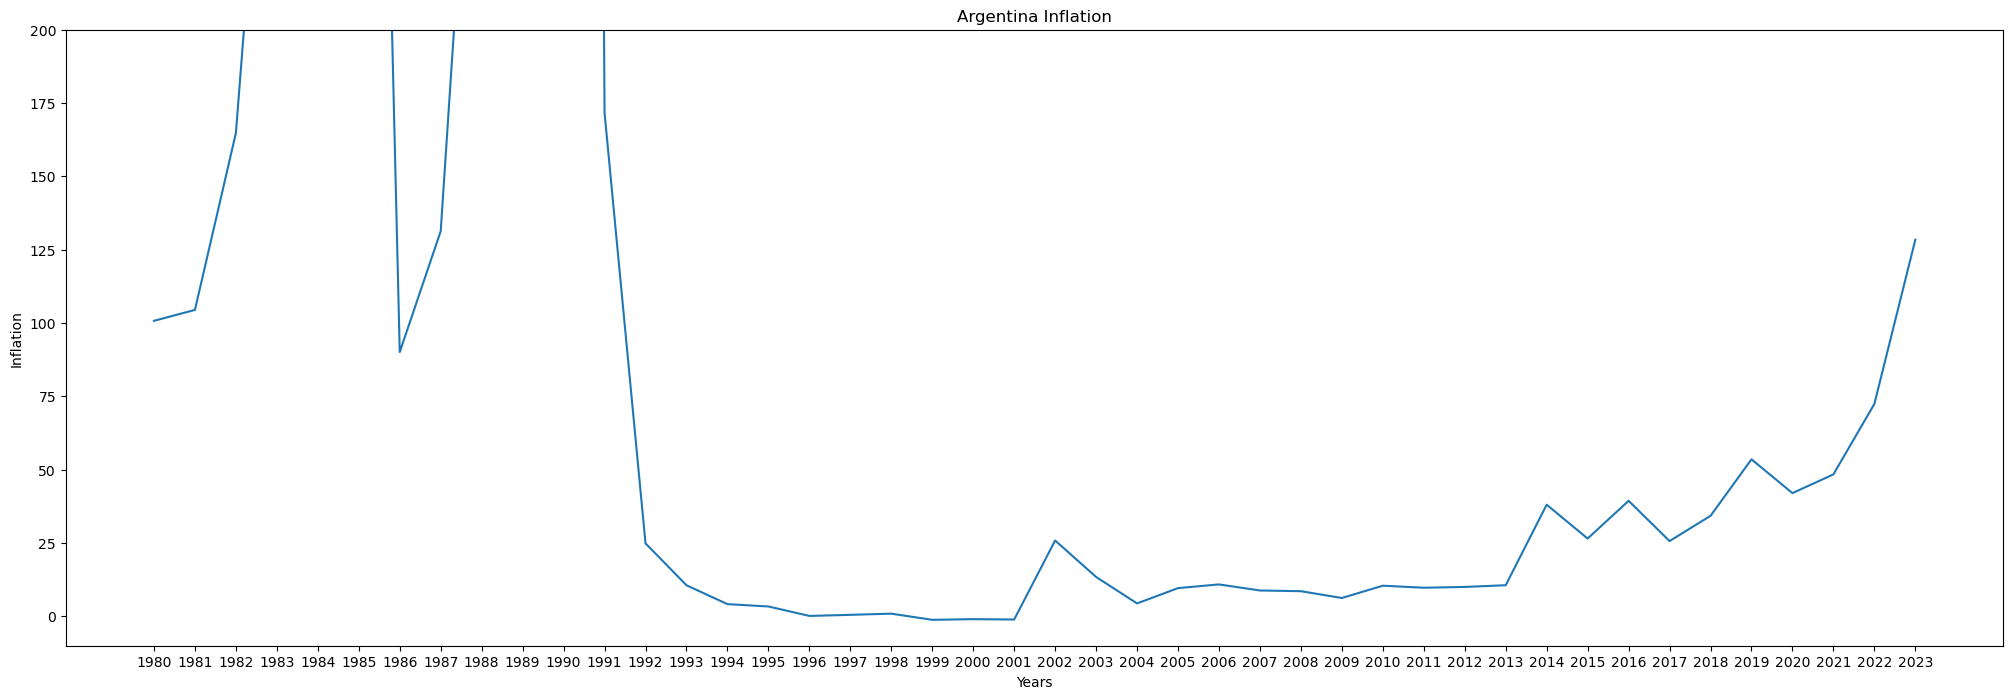

     1982    1983    1984    1985  1986
0  164.78  343.81  626.72  672.18  90.1
1  164.78  343.81  626.72  672.18  90.1 

0    131.33
1    131.33
Name: 1987, dtype: float64 

     1988     1989     1990    1991
0  342.95  3079.81  2313.96  171.67
1  342.96  3079.81  2313.96  171.67


In [230]:
plt.figure(figsize=(25, 8))

plt.plot(Argentinas.iloc[:, 2:].columns, Argentinas.iloc[:, 2:].values[0])
plt.plot()

plt.xlabel("Years")
plt.ylabel("Inflation")
plt.ylim(bottom=-10, top=200)

plt.title("Argentina Inflation")

plt.show()

print(Argentinas.loc[:, '1982': '1986'], '\n')
print(Argentinas.loc[:, '1987'], '\n')
print(Argentinas.loc[:, '1988': '1991'])

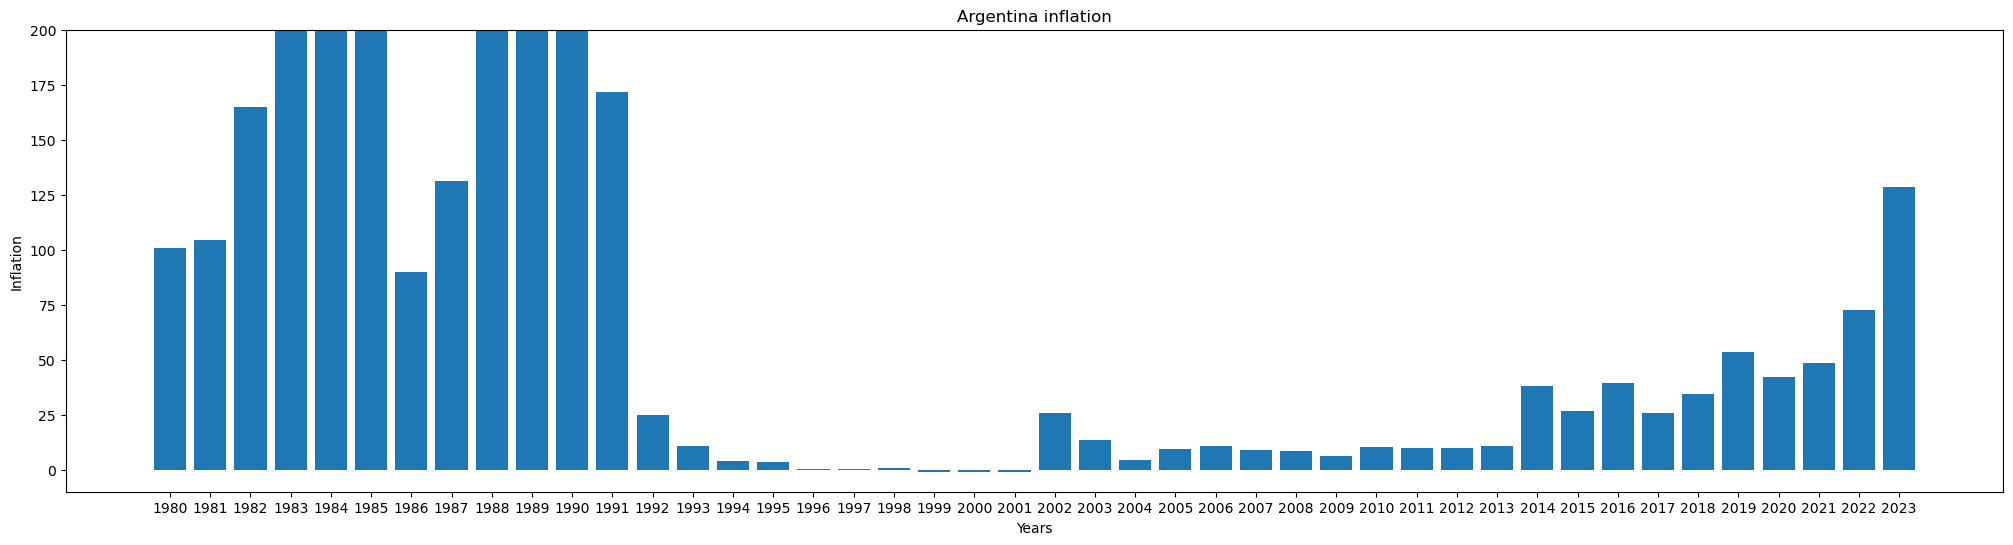

In [231]:
plt.figure(figsize=(25, 6))

plt.bar(Argentinas.iloc[:, 2:].columns, Argentinas.iloc[:, 2:].values[0])

plt.xlabel("Years")
plt.ylabel("Inflation")
plt.ylim(bottom=-10, top=200)

plt.title("Argentina inflation")

plt.show()

---

<font style="color: green; font-size: 35px">Save changes</font>

In [232]:
CPIa.to_csv("Inflation.csv")

In [233]:
CPIa

,Country,Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Algeria,DZA,6.60,2.63,3.66,6.17,4.70,8.23,9.43,11.99,...,3.88,4.39,5.80,5.59,3.51,1.95,2.42,7.23,9.27,9.32
1,Angola,AGO,7.97,5.78,15.80,15.67,27.42,29.00,80.70,69.01,...,7.30,9.16,32.38,29.84,19.63,17.08,21.02,23.85,23.83,13.64
2,Antigua and Barbuda,ATG,8.87,8.63,12.67,21.72,12.97,8.61,15.62,13.75,...,1.09,0.97,-0.49,2.42,1.21,1.48,1.06,1.63,7.53,5.07
3,Argentina,ARG,13.59,34.73,58.45,61.25,23.47,182.93,443.97,176.00,...,38.08,26.54,39.40,25.68,34.28,53.55,42.02,48.41,72.43,128.41
4,Australia,AUS,3.44,6.14,6.02,9.09,15.42,15.16,13.32,12.31,...,2.49,1.51,1.28,1.97,1.91,1.61,0.85,2.82,6.59,5.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Liechtenstein,LIE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,-1.11,-0.41,0.51,0.92,0.40,-0.70,0.51,8.40,6.35
199,South Sudan,SSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.66,52.81,379.85,187.87,83.49,51.19,29.68,30.23,-6.69,2.38
200,British Virgin Islands,VGB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,0.80,1.10,1.20,2.10,1.40,0.40,2.80,NaN,NaN
201,Martinique,MTQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.07,NaN


<font style="font-size: 35px; color: Skyblue">SQL</font>

### First we need to change the format data presentation 'data frame' to 'dictionary'

In [234]:
data = {'country_code': CPIa['Code'], 
        'country_name': CPIa['Country'], 
        }
years_dict = {i: CPIa[i] for i in CPIa.iloc[:, 2:].columns}
data = data | years_dict

data.keys()
#data = pd.DataFrame(data)

#####################################################################################################################################

df_for_sql = CPIa.rename(columns={'Country': 'country_name', 'Code': 'country_code'})

df_for_sql = df_for_sql.melt(id_vars=['country_name', 'country_code'], var_name='year', value_name='inflation_rate')
print(df_for_sql)

                 country_name country_code  year  inflation_rate
0                     Algeria          DZA  1970            6.60
1                      Angola          AGO  1970            7.97
2         Antigua and Barbuda          ATG  1970            8.87
3                   Argentina          ARG  1970           13.59
4                   Australia          AUS  1970            3.44
...                       ...          ...   ...             ...
10957           Liechtenstein          LIE  2023            6.35
10958             South Sudan          SSD  2023            2.38
10959  British Virgin Islands          VGB  2023             NaN
10960              Martinique          MTQ  2023             NaN
10961                    Niue          NIU  2023            8.60

[10962 rows x 4 columns]


In [240]:
import sys
import os

current_dir = os.path.dirname('Inflation')
parent_dir = os.path.abspath(os.path.join(current_dir, '..', '..'))
sys.path.append(parent_dir)

from InflationDB import insert_data_into_inflationDB

insert_data_into_inflationDB(df_for_sql)

OperationalError: near "countries": syntax error

In [239]:
df[['country_code', 'country_name']].drop_duplicates().values.tolist()

[['DZA', 'Algeria'],
 ['AGO', 'Angola'],
 ['ATG', 'Antigua and Barbuda'],
 ['ARG', 'Argentina'],
 ['AUS', 'Australia'],
 ['AUT', 'Austria'],
 ['BHS', 'Bahamas, The'],
 ['BHR', 'Bahrain'],
 ['BGD', 'Bangladesh'],
 ['BRB', 'Barbados'],
 ['BLR', 'Belarus'],
 ['BEL', 'Belgium'],
 ['BLZ', 'Belize'],
 ['BEN', 'Benin'],
 ['BOL', 'Bolivia'],
 ['BWA', 'Botswana'],
 ['BRA', 'Brazil'],
 ['BRN', 'Brunei Darussalam'],
 ['BGR', 'Bulgaria'],
 ['BFA', 'Burkina Faso'],
 ['BDI', 'Burundi'],
 ['CPV', 'Cabo Verde'],
 ['CMR', 'Cameroon'],
 ['CAN', 'Canada'],
 ['CAF', 'Central African Republic'],
 ['TCD', 'Chad'],
 ['CHL', 'Chile'],
 ['CHN', 'China'],
 ['COL', 'Colombia'],
 ['COM', 'Comoros'],
 ['COD', 'Congo, Dem. Rep.'],
 ['COG', 'Congo, Rep.'],
 ['CRI', 'Costa Rica'],
 ['CIV', "Côte d'Ivoire"],
 ['CYP', 'Cyprus'],
 ['CZE', 'Czech Republic'],
 ['DNK', 'Denmark'],
 ['DJI', 'Djibouti'],
 ['DMA', 'Dominica'],
 ['DOM', 'Dominican Republic'],
 ['ECU', 'Ecuador'],
 ['EGY', 'Egypt, Arab Rep.'],
 ['SLV', 'El Salv